In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
!pip install graphviz
!pip install pydotplus

# Business_Problem:
    Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



# Importing_Data & EDA-Visualization

In [5]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
df1 = df.copy()

In [7]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [9]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# Outlier_Detection:

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


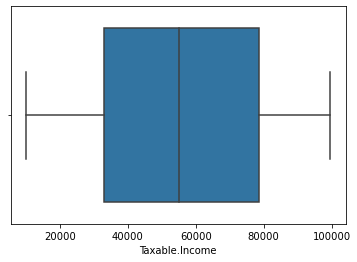

In [11]:
ax = sns.boxplot(df1['Taxable.Income'])

# _By observing the data we have seen that there is not oulier in the boxplot:_

In [13]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


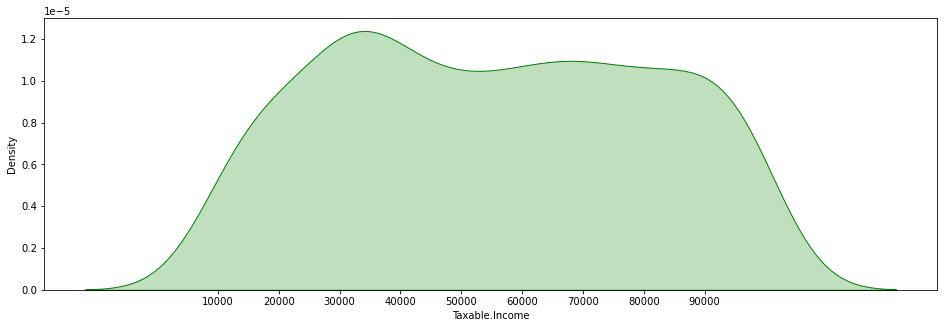

In [14]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

# _The data is right_centered and right_skewed in nature & following the negative kurtosis:_

In [15]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

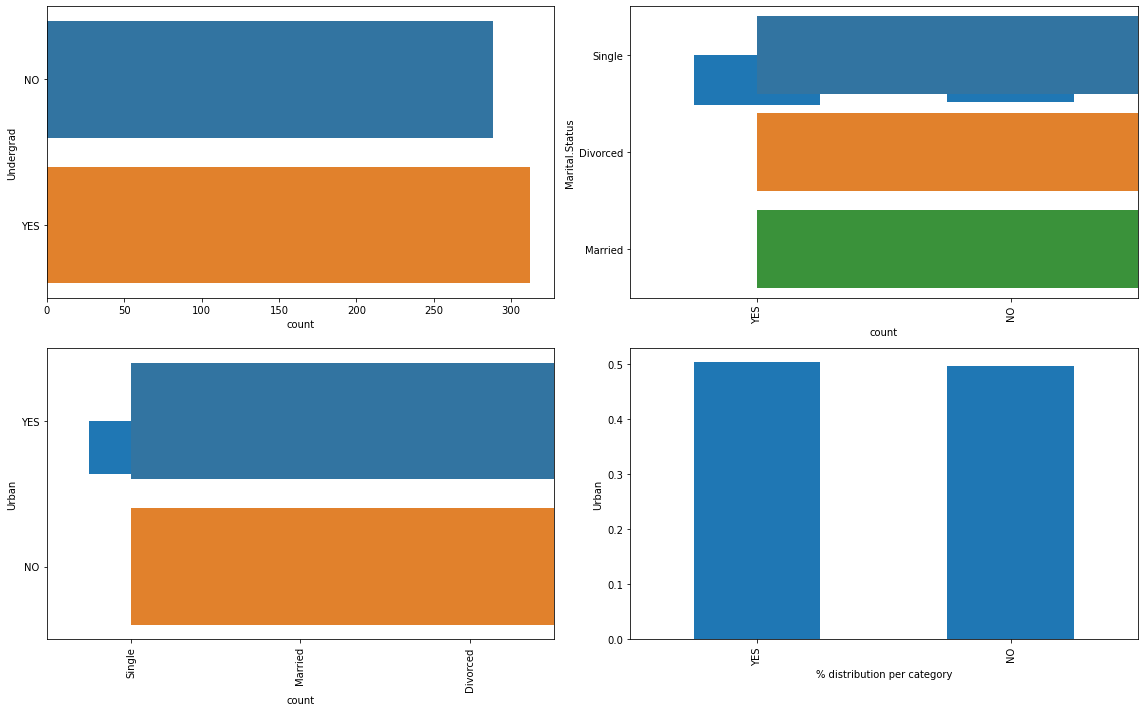

In [16]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [17]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()


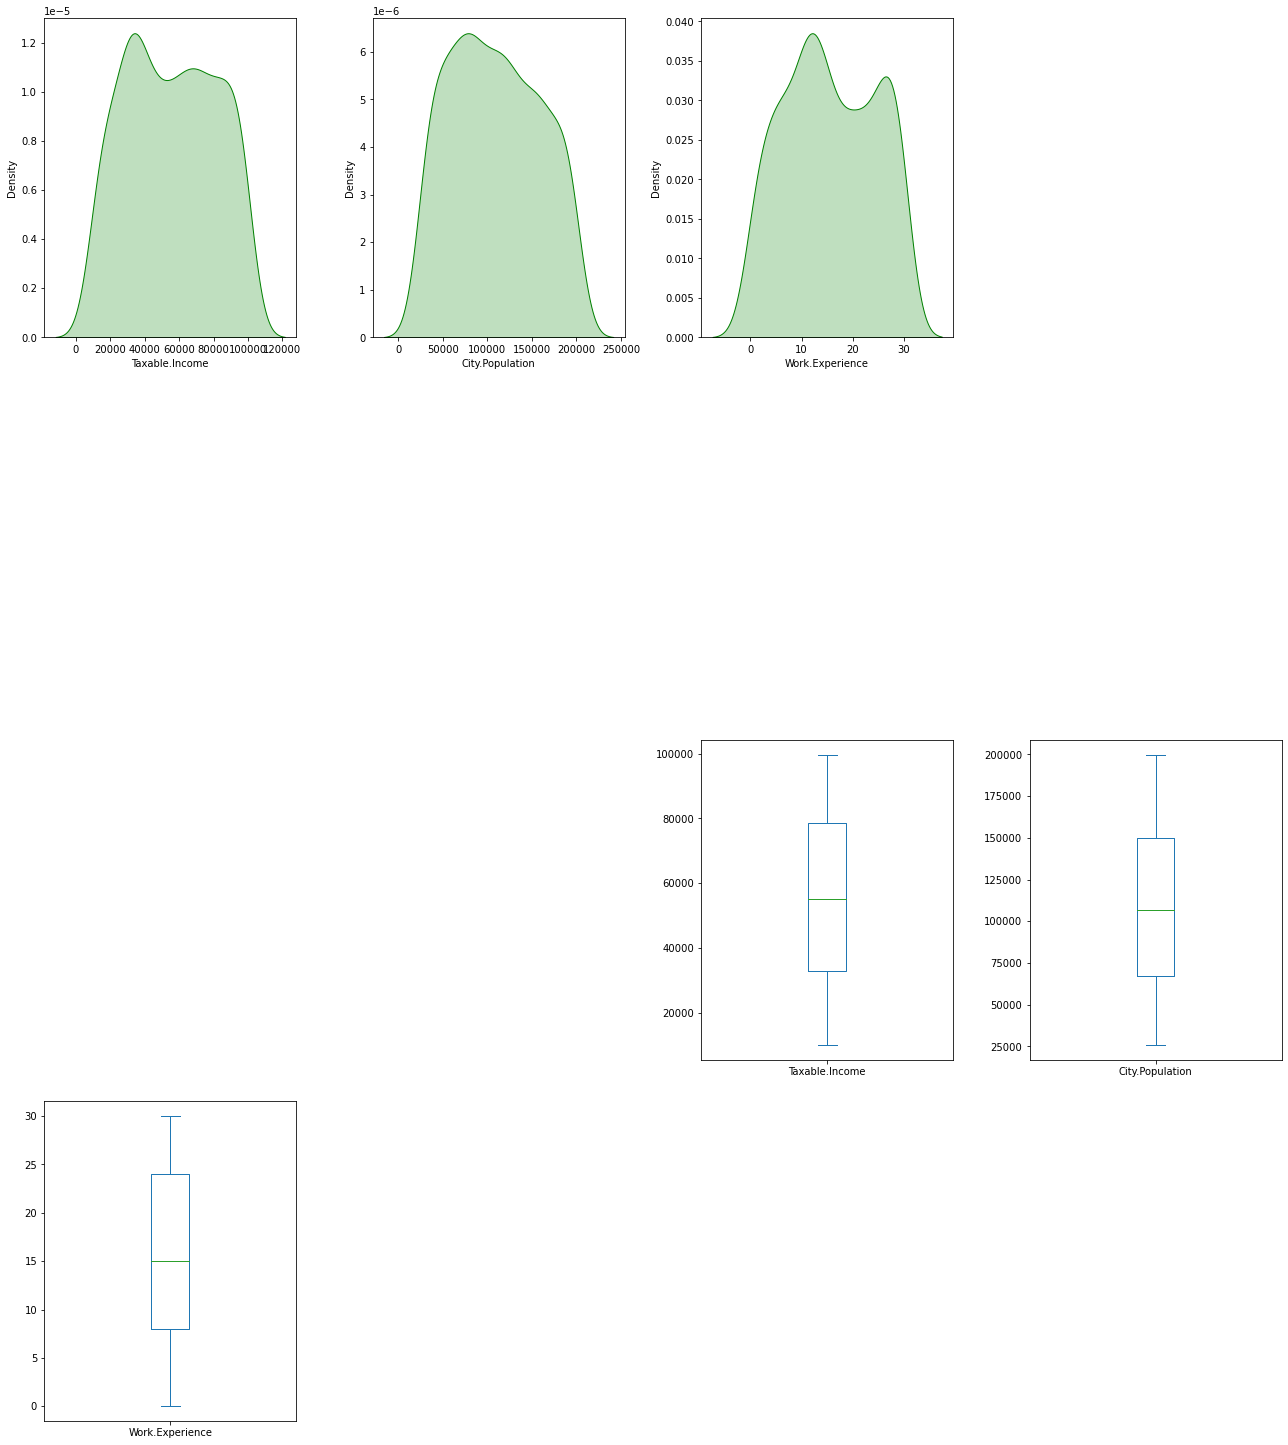

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [18]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [19]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])


In [20]:
corr = df1.corr()


<AxesSubplot:>

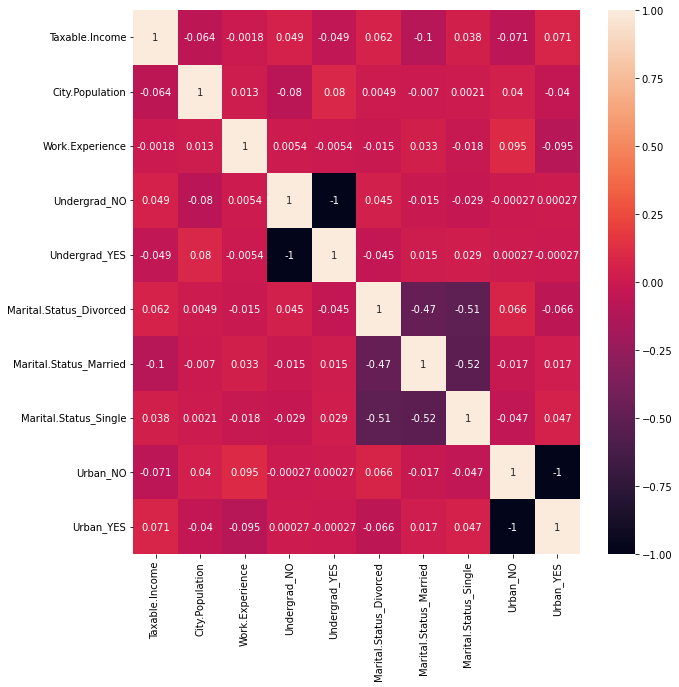

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# _Applying Decision_Tree & Building the model_

In [22]:
#The target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [23]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])


In [24]:
list(df1.columns)


['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [25]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [27]:
y_train.value_counts()


good     380
risky    100
Name: Taxable.Income, dtype: int64

In [28]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
pred_train = model.predict(x_train)


In [30]:
accuracy_score(y_train,pred_train)


1.0

In [31]:
confusion_matrix(y_train,pred_train)


array([[380,   0],
       [  0, 100]], dtype=int64)

In [32]:
pred_test = model.predict(x_test)


In [33]:
accuracy_score(y_test,pred_test)


0.6583333333333333

In [34]:
confusion_matrix(y_test,pred_test)


array([[75, 21],
       [20,  4]], dtype=int64)

In [35]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})


In [36]:
df_t


,Actual,Predicted
411,good,good
378,good,good
457,risky,good
488,good,good
164,good,good
...,...,...
499,good,risky
472,good,risky
303,good,risky
45,good,good


In [37]:
cols = list(df1.columns)


In [38]:
predictors = cols[1:10]
target = cols[0]

In [39]:
dot_data = StringIO()


In [40]:
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)


In [41]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [42]:
graph.write_png('fraud_full.png')


True

In [43]:
#Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 69%
#As seen in the confusion matrix of Test data 82 instances are presdected correctly and 38 instances are not

In [44]:
img = mpimg.imread('fraud_full.png') 


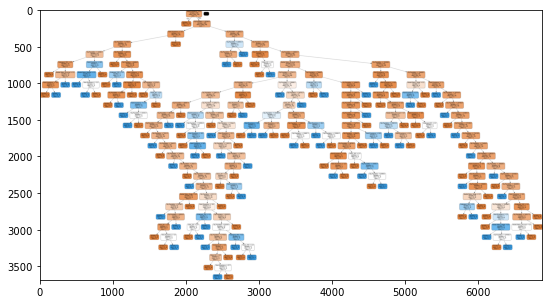

In [45]:
plt.imshow(img)

In [46]:
model.feature_importances_


array([0.50707601, 0.30350712, 0.0080557 , 0.05117585, 0.04450921,
       0.00536191, 0.0322423 , 0.03465429, 0.01341761])

In [47]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [48]:
fi

,feature,importance
0,City.Population,0.507076
1,Work.Experience,0.303507
3,Undergrad_YES,0.051176
4,Marital.Status_Divorced,0.044509
7,Urban_NO,0.034654
6,Marital.Status_Single,0.032242
8,Urban_YES,0.013418
2,Undergrad_NO,0.008056
5,Marital.Status_Married,0.005362


# Conclusion:
_By observing the above table we can say that *city_population* is most important feature by other than 50%_